#  <center> Data Science 100 Group Project <center>
## <center> Predicting Heart Disease Presence <center>

## Introduction

## Data Analysis

In [1]:
install.packages("themis")

also installing the dependencies ‚ÄòRANN‚Äô, ‚ÄòROSE‚Äô


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
## load packages
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(themis)

‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 1.3.1 ‚îÄ‚îÄ

‚úî ggplot2 3.3.6     ‚úî purrr   0.3.4
‚úî tibble  3.1.7     ‚úî dplyr   1.0.9
‚úî tidyr   1.2.0     ‚úî stringr 1.4.0
‚úî readr   2.1.2     ‚úî forcats 0.5.1

‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()

‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidymodels 1.0.0 ‚îÄ‚îÄ

‚úî broom        1.0.0     ‚úî rsample      1.0.0
‚úî dials        1.0.0     ‚úî tune         1.0.0
‚úî infer        1.0.2     ‚úî workflows    1.0.0
‚úî modeldata    1.0.0     ‚úî workflowsets 1.0.0
‚úî parsnip      1.0.0     ‚úî yardstick    1.0.0


In [3]:
## read data and mutate response variable to be a factor
url <- "https://raw.githubusercontent.com/Kyleetd/DSCI100-Course-Project-2023/main/heart_disease.csv"

heart_disease_data <- read_csv(url) |>
  rename(
    'heart_stroke' = 'Heart_ stroke') |>
 mutate(heart_stroke = factor(heart_stroke,levels = c("yes", "No"),labels = c("yes", "no"))) 

head(heart_disease_data)

Rows: 4238 Columns: 16
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
chr  (4): Gender, education, prevalentStroke, Heart_ stroke
dbl (12): age, currentSmoker, cigsPerDay, BPMeds, prevalentHyp, diabetes, to...

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Gender age education     currentSmoker cigsPerDay BPMeds prevalentStroke
1 0      39  postgraduate  0              0         0      no             
2 0      46  primaryschool 0              0         0      no             
3 1      48  uneducated    1             20         0      no             
4 1      61  graduate      1             30         0      no             
5 1      46  graduate      1             23         0      no             
6 0      43  primaryschool 0              0         0      no             
  prevalentHyp diabetes totChol sysBP diaBP BMI   heartRate glucose
1 0            0        195     106.0  70   26.97 80         77    
2 0            0        250     121.0  81   28.73 95         76    
3 0            0        245     127.5  80   25.34 75         70    
4 1            0        225     150.0  95   28.58 65        103    
5 0            0        285     130.0  84   23.10 85         85    
6 1            0        228     180.0 110   30.30 77         99    
  heart_stroke
1 no          
2 no          
3 no          
4 yes         
5 no          
6 no

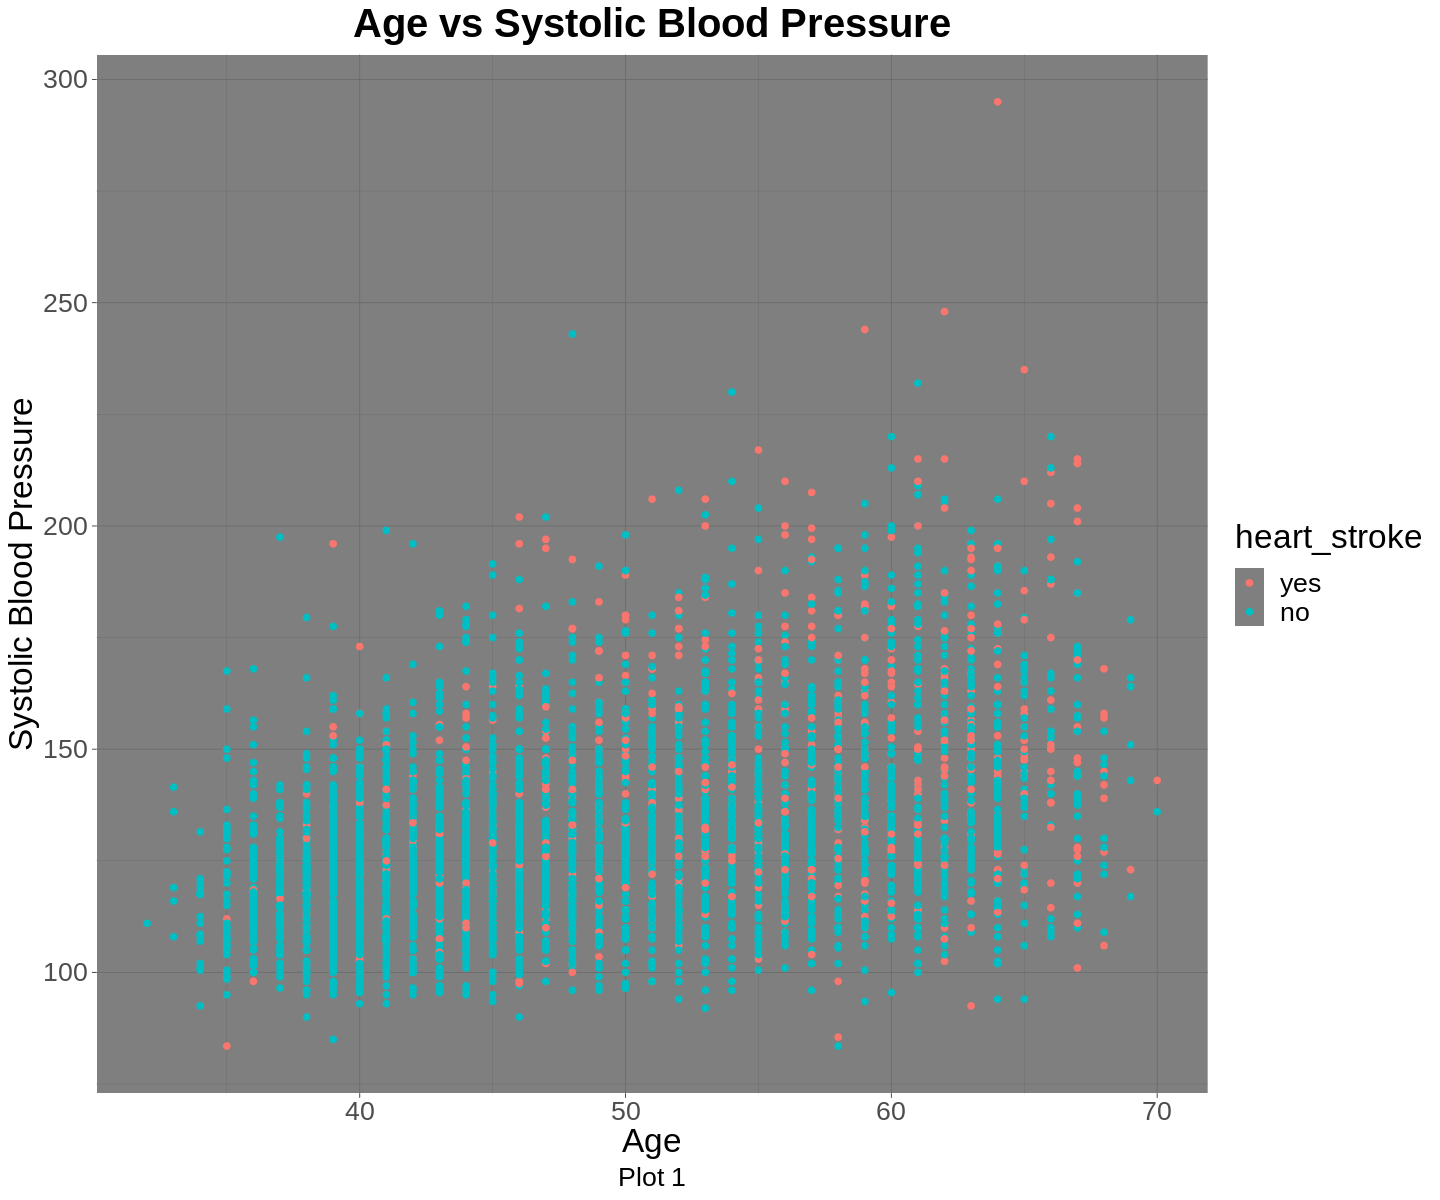

In [4]:
## Filter data so there's no N/A observations in the predictor variables
heart_disease_filtered <- filter(heart_disease_data, heart_stroke != "NA", age != "NA", sysBP != "NA") 

options(repr.plot.width=12, repr.plot.height=10)
plot <- ggplot(heart_disease_filtered, aes(x = age, y = sysBP, color = heart_stroke)) +
  geom_point() +
  labs(x = "Age", 
       y = "Systolic Blood Pressure", 
       title = "Age vs Systolic Blood Pressure", 
       caption = "Plot 1") +
  theme_dark() +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

plot

In [5]:
## establish training and testing data sets
set.seed(5)
heart_disease_split <- initial_split(heart_disease_filtered, prop = 0.75, strata = heart_stroke)  
heart_disease_train <- training(heart_disease_split)   
heart_disease_test <- testing(heart_disease_split)

### Calibrating Parameter K

In [6]:
## Create model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

heart_recipe <- recipe(heart_stroke ~ age + sysBP, data = heart_disease_train) |>
   step_upsample(heart_stroke, over_ratio = 1, skip = FALSE) |>
   prep() 

heart_disease_train_balanced <- bake(heart_recipe, heart_disease_train)

heart_recipe_balanced <- recipe(heart_stroke ~ age + sysBP, data = heart_disease_train_balanced) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

head(heart_disease_train_balanced)

age sysBP heart_stroke
1 58  129   yes         
2 52  126   yes         
3 41  141   yes         
4 52  148   yes         
5 67  155   yes         
6 42  118   yes

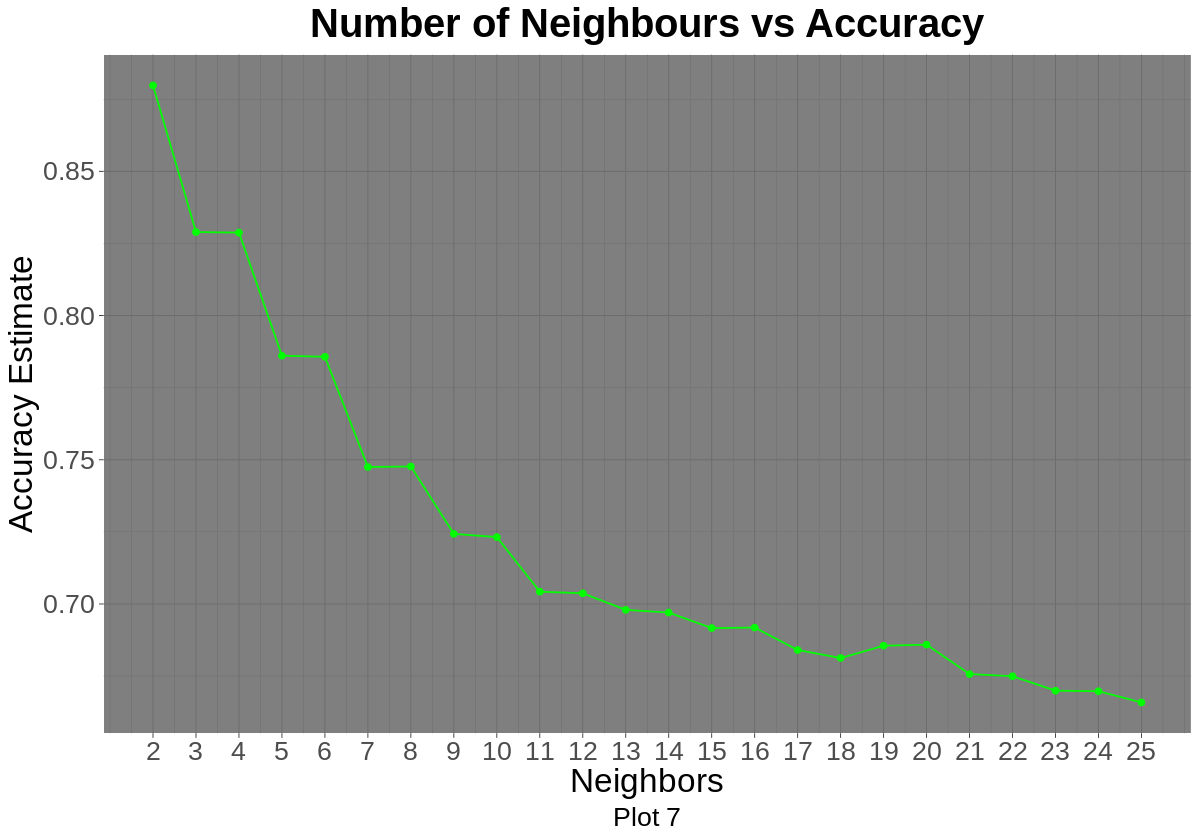

In [7]:
# Cross validation
heart_vfold <- vfold_cv(heart_disease_train_balanced, v = 10, strata = heart_stroke)

## k values to try
k_vals <- tibble(neighbors = seq(from = 2, to = 25, by = 1))

## Create a workflow & get accuracy metrics
heart_accuracies <- workflow() |>
      add_recipe(heart_recipe_balanced) |>
      add_model(knn_spec) |>
      tune_grid(resamples = heart_vfold, grid = k_vals) |>
      collect_metrics() |>
      filter(.metric == "accuracy")

## Plot the ùëò vs the accuracy
options(repr.plot.width=10, repr.plot.height=7)
cross_val_plot <- ggplot(heart_accuracies, aes(x = neighbors, y = mean)) +
  geom_point(color = "green") +
  geom_line(color = "green") +
  labs(x = "Neighbors", 
       y = "Accuracy Estimate", 
       title = "Number of Neighbours vs Accuracy", 
       caption = "Plot 7") +
  scale_x_continuous(breaks = round(seq(min(heart_accuracies$neighbors), max(heart_accuracies$neighbors), by = 1),1)) +
  theme_dark() +
  theme(text = element_text(size = 20), plot.title = element_text(face = "bold", hjust = 0.5), plot.caption = element_text(hjust = 0.5))

cross_val_plot

In [8]:
## Select highest accuracy k
k <- heart_accuracies |>
    arrange(-mean) |>
    slice(1) |>
    pull(neighbors)
k 

[1] 2

### Conducting Classification with Highest Accuracy K

In [ ]:
## New model specification
knn_refined_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) |>
      set_engine("kknn") |>
      set_mode("classification")

## New workflow 
heart_fit <- workflow() |>
      add_recipe(heart_recipe_balanced) |>
      add_model(knn_spec) |>
      fit(data = heart_disease_train_balanced)

Warning message:
‚Äútune samples were requested but there were 5390 rows in the data. 5385 will be used.‚Äù


#### Predict 

In [ ]:
set.seed(9999) 

## predict on the test dataset using refined model
predictions <- predict(heart_fit, heart_disease_test) |>
      bind_cols(heart_disease_test) ## add prediction column to testing_set dataframe 

## accuracy of this prediction
metrics <- predictions |>
  metrics(truth = heart_stroke, estimate = .pred_class)

## confusion matrix
conf_mat <- predictions |> 
    conf_mat(truth = heart_stroke, estimate = .pred_class)

conf_mat
metrics